<a href="https://colab.research.google.com/github/musicjae/intro_to_python/blob/master/Pytorch/pytorch_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 비선형 모델

In [60]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(4)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 활성화 함수

In [3]:
x = torch.linspace(-5, 5, 200) # -5 ~ 5를 200개로 자르기
x = Variable(x)
x_np = x.data.numpy()
print(len(x_np))

200


In [4]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


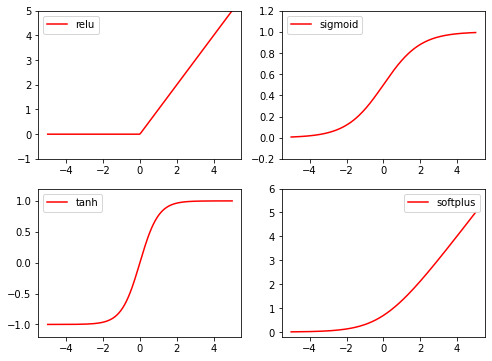

In [5]:

plt.figure(1, figsize=(8,6))

plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')
plt.show()

### 데이터 만들기

비선형 모델이니까 2 차원 이상의 데이터를 만들자

In [29]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
print(x.shape) # we need to 2dim mat to calculate datas as matrix
print(x.dim())
print(x.size())
torch

torch.Size([100, 1])
2
torch.Size([100, 1])


<module 'torch' from '/usr/local/lib/python3.6/dist-packages/torch/__init__.py'>

In [30]:
y=x.pow(2) + 0.1*torch.rand(x.size())
x,y = Variable(x), Variable(y)

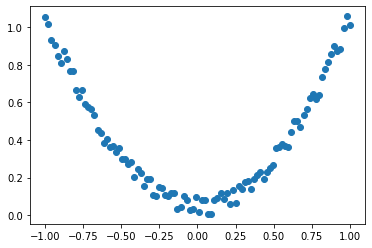

In [12]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### 모델 만들기

nn.Linear Parameters :  nn.Linear(in_features, out_features, bias) 
1. in_features – size of each input sample 
2. out_features – size of each output sample  
3. bias – If set to False, the layer will not learn an additive bias. Default: True


In [31]:
hidden = nn.Linear(1,20, bias=True)
activation = nn.ReLU()
output = nn.Linear(20,1, bias=True)

In [32]:
# integration
net = nn.Sequential(hidden,activation,output)

### 옵티마이저

In [35]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

### 손실 함수

In [36]:
loss_fn = torch.nn.MSELoss()

### 모델 학습

In [37]:
x.size()

torch.Size([100, 1])

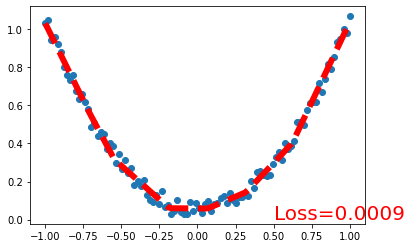

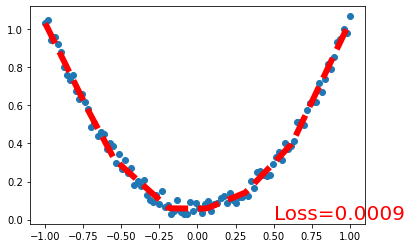

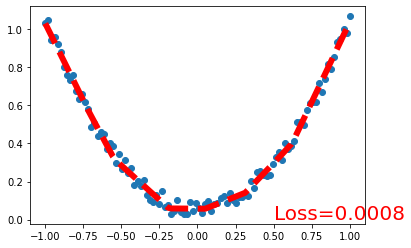

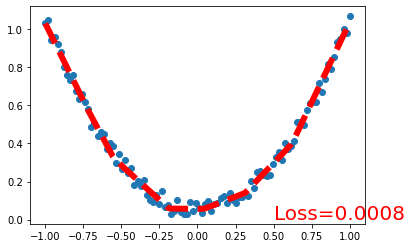

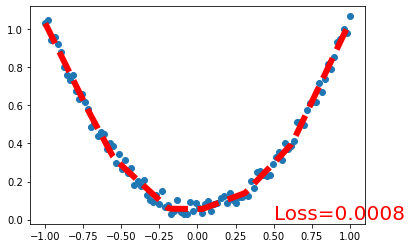

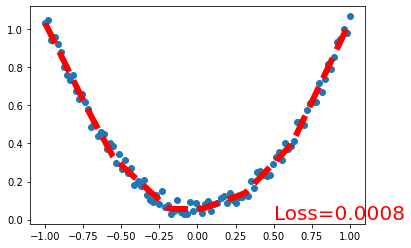

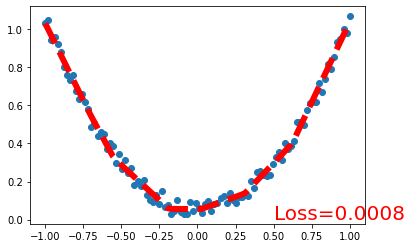

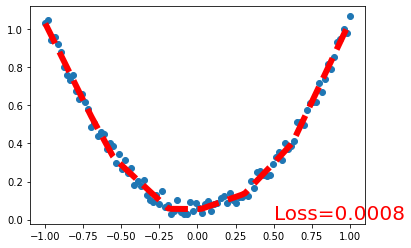

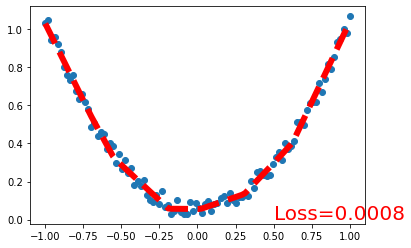

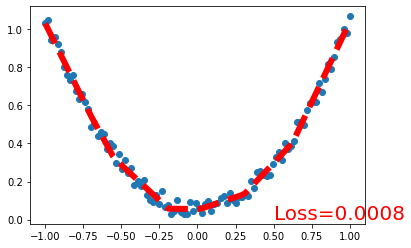

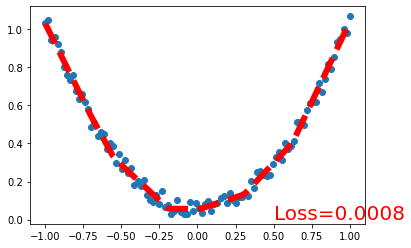

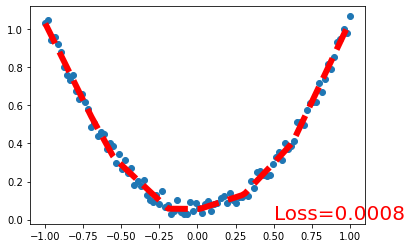

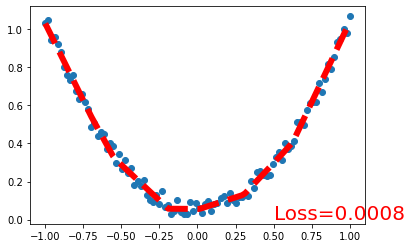

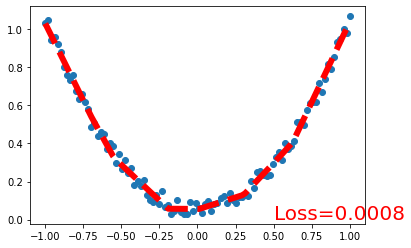

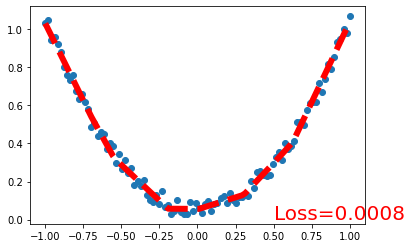

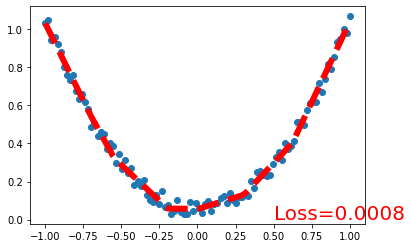

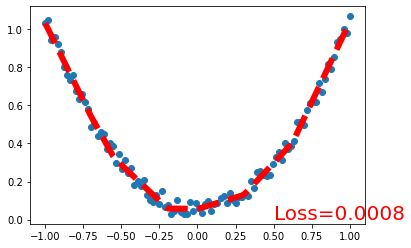

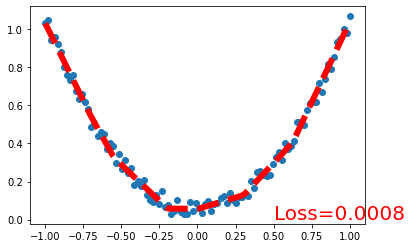

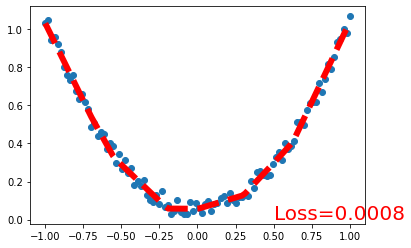

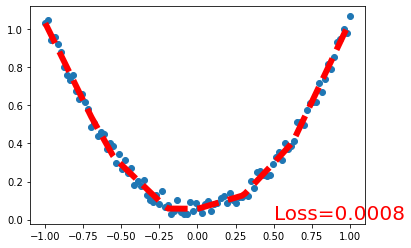

In [40]:
for t in range(200):

    pred = net(x) # 모델에 데이터 x를 넣는다

    """
    순서를 

    lr=0.01 인 경우엔 학습이 잘 안된다.
    lr=0.1로 변경하니 학습이 잘 된다.

    """
    optimizer.zero_grad()
    loss =loss_fn(pred, y)

    loss.backward()
    optimizer.step()

    if t % 10  == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r--', lw=6)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size':20, 'color':'red'})
        plt.show()
        plt.pause(0.2)
        
plt.ioff()

### 변수 저장

In [44]:
torch.save(net.state_dict(), 'content')
net.state_dict()

OrderedDict([('0.weight', tensor([[-0.1306],
                      [-1.1495],
                      [ 0.2356],
                      [ 1.4202],
                      [ 1.0713],
                      [-0.1579],
                      [-1.5290],
                      [ 0.1943],
                      [-0.1592],
                      [-0.0885],
                      [-0.8453],
                      [ 1.1904],
                      [ 0.9886],
                      [ 0.5668],
                      [ 1.0388],
                      [ 0.1131],
                      [ 0.3310],
                      [ 0.5951],
                      [ 0.6514],
                      [-0.6168]])),
             ('0.bias',
              tensor([-1.0068e+00, -6.2916e-01,  2.5350e-01, -4.2903e-01, -6.7316e-01,
                      -4.1870e-01, -3.0321e-01,  2.3113e-01, -4.7719e-01, -2.6596e-01,
                      -9.6469e-01, -7.4440e-01, -5.7495e-04, -7.1076e-01, -5.7730e-01,
                      -2.0100e-01, -5.20

In [45]:
net.load_state_dict(torch.load('content'))
net.state_dict()

OrderedDict([('0.weight', tensor([[-0.1306],
                      [-1.1495],
                      [ 0.2356],
                      [ 1.4202],
                      [ 1.0713],
                      [-0.1579],
                      [-1.5290],
                      [ 0.1943],
                      [-0.1592],
                      [-0.0885],
                      [-0.8453],
                      [ 1.1904],
                      [ 0.9886],
                      [ 0.5668],
                      [ 1.0388],
                      [ 0.1131],
                      [ 0.3310],
                      [ 0.5951],
                      [ 0.6514],
                      [-0.6168]])),
             ('0.bias',
              tensor([-1.0068e+00, -6.2916e-01,  2.5350e-01, -4.2903e-01, -6.7316e-01,
                      -4.1870e-01, -3.0321e-01,  2.3113e-01, -4.7719e-01, -2.6596e-01,
                      -9.6469e-01, -7.4440e-01, -5.7495e-04, -7.1076e-01, -5.7730e-01,
                      -2.0100e-01, -5.20

# 2 배치 학습

In [61]:
import torch
from torch.autograd import Variable
import torch.nn as nn
torch.manual_seed(5)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import torch.utils.data as Data
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

### 데이터 로드

In [52]:
x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)
print(x.view(len(x),-1).size())
print(y.view(len(y),-1).size())
print(torch.cat((x.view(len(x),-1),y.view(len(y),-1)),1).size())
print(torch.cat((x.view(len(x),-1),y.view(len(y),-1)),1))

torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 2])
tensor([[ 1., 10.],
        [ 2.,  9.],
        [ 3.,  8.],
        [ 4.,  7.],
        [ 5.,  6.],
        [ 6.,  5.],
        [ 7.,  4.],
        [ 8.,  3.],
        [ 9.,  2.],
        [10.,  1.]])


In [56]:
dataset = Data.TensorDataset(x,y)
print(dataset.tensors,type(dataset))

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])) torch.utils.data.dataset.TensorDataset


In [69]:
batch_size = 5

loader = Data.DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers = 4 # Setting the argument num_workers as a positive integer will turn on multi-process data loading with the specified number of loader worker processes.
)

하나의 epoch 안에 step이 2 개

In [72]:
for epoch in range(12):
    for step, (batch_x, batch_y) in enumerate(loader):
        print('Epoch : ',epoch+1,'| Step', step+1, '| batch x :', batch_x.numpy(), "| bactch y : ",batch_y.numpy())

Epoch :  1 | Step 1 | batch x : [1. 2. 3. 4. 5.] | bactch y :  [10.  9.  8.  7.  6.]
Epoch :  1 | Step 2 | batch x : [ 6.  7.  8.  9. 10.] | bactch y :  [5. 4. 3. 2. 1.]
Epoch :  2 | Step 1 | batch x : [1. 2. 3. 4. 5.] | bactch y :  [10.  9.  8.  7.  6.]
Epoch :  2 | Step 2 | batch x : [ 6.  7.  8.  9. 10.] | bactch y :  [5. 4. 3. 2. 1.]
Epoch :  3 | Step 1 | batch x : [1. 2. 3. 4. 5.] | bactch y :  [10.  9.  8.  7.  6.]
Epoch :  3 | Step 2 | batch x : [ 6.  7.  8.  9. 10.] | bactch y :  [5. 4. 3. 2. 1.]
Epoch :  4 | Step 1 | batch x : [1. 2. 3. 4. 5.] | bactch y :  [10.  9.  8.  7.  6.]
Epoch :  4 | Step 2 | batch x : [ 6.  7.  8.  9. 10.] | bactch y :  [5. 4. 3. 2. 1.]
Epoch :  5 | Step 1 | batch x : [1. 2. 3. 4. 5.] | bactch y :  [10.  9.  8.  7.  6.]
Epoch :  5 | Step 2 | batch x : [ 6.  7.  8.  9. 10.] | bactch y :  [5. 4. 3. 2. 1.]
Epoch :  6 | Step 1 | batch x : [1. 2. 3. 4. 5.] | bactch y :  [10.  9.  8.  7.  6.]
Epoch :  6 | Step 2 | batch x : [ 6.  7.  8.  9. 10.] | bactch y 

# 3 최적화 (비선형함수 비교)

In [79]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 50

### 3.1 데이터셋 로드

In [84]:
x = torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)
y = x.pow(2)+0.1*torch.normal(torch.zeros(x.size())) # Returns a tensor of random numbers drawn from separate normal distributions whose mean and standard deviation are given.

In [85]:
print(y.size())

torch.Size([1000, 1])


In [86]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE, # BATCH_SIZE = 32
    shuffle = True, num_workers=2,)

In [113]:
cnt=1
for i, (bat_x, bat_y) in enumerate(loader):
    if i ==0:
        print(bat_x.size())

    if i == 31:
        print(bat_x.size())
    cnt += 1

print('cnt: ', cnt)

torch.Size([32, 1])
torch.Size([8, 1])
cnt:  33


### 3.2 모델 정의

##### net 만들기

In [114]:
class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.output = torch.nn.Linear(20,1)

    def forward(self, x):
        x=F.relu(self.hidden(x)) # 층 한 개 통과
        x=self.output(x) 

        return x

##### 비교 대상이 될 nets들 초기화

In [115]:
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD,net_Momentum,net_RMSprop, net_Adam]

##### 옵티마이저 설정

In [116]:
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr = LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr = LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers = [opt_SGD, opt_Momentum,opt_RMSprop,opt_Adam]

In [120]:
loss_func = torch.nn.MSELoss()
losses_each = [[],[],[],[]] # 아래 학습 과정에서 구한 각 EPOCH에서 여러 옵티마이저들을 사용한 경우의 LOSS들을 저장할 리스트 초기화

### 학습

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49


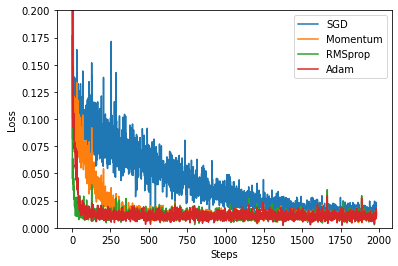

In [123]:
for epoch in range(EPOCH):
    print('Epoch: ',epoch)

    for step, (batch_x, batch_y) in enumerate(loader):

        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        """
        Variable은 data, grad, grad_fn 3가지 형태로 이루어집니다.

        data는 a의 tensor 형태의 데이터가 담기고 위 소스 코드상의 a = torch.rand(5)에 해당합니다.

        grad는 data가 거쳐온 layer에 대한 미분값이 축적되는 것

        grad_fn는 미분값을 계산한 함수에 대한 정보

        출처: https://do-hansung.tistory.com/16

        """
        for net, opt, l_each_each in zip(nets, optimizers, losses_each):

            output=net(b_x)
            loss=loss_fn(output, b_y) # 정답과 예측 비교
            opt.zero_grad()

            loss.backward()
            opt.step()
            l_each_each.append(loss.data)

labels = ['SGD', 'Momentum','RMSprop','Adam']
for i, l_each_each in enumerate(losses_each):
    plt.plot(l_each_each, label = labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()


        

Adam과 RMSProp이 가장 좋은 성능을 보인다.